# Task
A client is thinking of setting up an Airbnb business in Bangkok, he has tasked me with analyzing Bangkok's existing Airbnbs to help him succeed.

In [4]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/listings.csv')
df2 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/listings.csv')
df3 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/calendar.csv')
df4 = pd.read_excel('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/zipcodes.xlsx')

/var/folders/27/hj1bvt014t3_6yjh05291ys80000gn/T/ipykernel_39798/172156782.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/calendar.csv')


In [6]:
#finding out what is wrong. Here we see that column 4(price) has a currency format
df3

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2024-12-26,t,$55.00,NaN,30.0,240.0
1,27934,2024-12-27,f,$55.00,NaN,30.0,240.0
2,27934,2024-12-28,f,$55.00,NaN,30.0,240.0
3,27934,2024-12-29,f,$55.00,NaN,30.0,240.0
4,27934,2024-12-30,t,$55.00,NaN,30.0,240.0
...,...,...,...,...,...,...,...
9347236,1317854477589411276,2025-12-21,t,"$1,200.00",NaN,1.0,365.0
9347237,1317854477589411276,2025-12-22,t,"$1,200.00",NaN,1.0,365.0
9347238,1317854477589411276,2025-12-23,t,"$1,200.00",NaN,1.0,365.0
9347239,1317854477589411276,2025-12-24,t,"$1,200.00",NaN,1.0,365.0


In [8]:
df3['price'].apply(type).value_counts()

price
<class 'str'>    9347241
Name: count, dtype: int64

In [10]:
df3['price']=df3['price'].str.strip('$')
df3['price']=df3['price'].str.replace(',','')
df3['price']=df3['price'].astype(float)
df3

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2024-12-26,t,55.0,NaN,30.0,240.0
1,27934,2024-12-27,f,55.0,NaN,30.0,240.0
2,27934,2024-12-28,f,55.0,NaN,30.0,240.0
3,27934,2024-12-29,f,55.0,NaN,30.0,240.0
4,27934,2024-12-30,t,55.0,NaN,30.0,240.0
...,...,...,...,...,...,...,...
9347236,1317854477589411276,2025-12-21,t,1200.0,NaN,1.0,365.0
9347237,1317854477589411276,2025-12-22,t,1200.0,NaN,1.0,365.0
9347238,1317854477589411276,2025-12-23,t,1200.0,NaN,1.0,365.0
9347239,1317854477589411276,2025-12-24,t,1200.0,NaN,1.0,365.0


# Data Cleaning

In [12]:
#removing duplicates
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
df4 = df4.drop_duplicates()

In [14]:
#getting overview of datasets
df1.info()
df2.info()
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25609 non-null  int64  
 1   listing_url                                   25609 non-null  object 
 2   scrape_id                                     25609 non-null  int64  
 3   last_scraped                                  25609 non-null  object 
 4   source                                        25609 non-null  object 
 5   name                                          25609 non-null  object 
 6   description                                   24823 non-null  object 
 7   neighborhood_overview                         9756 non-null   object 
 8   picture_url                                   25609 non-null  object 
 9   host_id                                       25609 non-null 

In [20]:
df3['adjusted_price'].value_counts()

adjusted_price
$161,500.00    179
$180,500.00     71
$170,000.00     64
$175,750.00     17
$195,000.00     16
$190,000.00     10
$185,250.00      8
Name: count, dtype: int64

In [22]:
#df3['adjusted_price'] has the same issue as earlier
df3['adjusted_price']=df3['adjusted_price'].str.strip('$')
df3['adjusted_price']=df3['adjusted_price'].str.replace(',','')
df3['adjusted_price']=df3['adjusted_price'].astype(float)
df3['adjusted_price'].value_counts()

adjusted_price
161500.0    179
180500.0     71
170000.0     64
175750.0     17
195000.0     16
190000.0     10
185250.0      8
Name: count, dtype: int64

In [24]:
#likewise for df2['price']
df2['price']=df2['price'].str.strip('$')
df2['price']=df2['price'].str.replace(',','')
df2['price']=df2['price'].astype(float)
df2['price'].value_counts()

price
1500.0     350
1200.0     344
2000.0     331
1000.0     275
800.0      240
          ... 
413.0        1
14914.0      1
8743.0       1
5186.0       1
3316.0       1
Name: count, Length: 4367, dtype: int64

In [57]:
#and df1
df1['price']=df1['price'].str.strip('$')
df1['price']=df1['price'].str.replace(',','')
df1['price']=df1['price'].astype(float)
df1['price'].value_counts()

price
1500.0     350
1200.0     344
2000.0     331
1000.0     275
800.0      240
          ... 
413.0        1
14914.0      1
8743.0       1
5186.0       1
3316.0       1
Name: count, Length: 4367, dtype: int64

In [26]:
#removing sparse data
df1 = df1.drop(df1.columns[[4,17]], axis=1)
df2 = df2.drop(df2.columns[[7,21,27,29,49,68]], axis=1)

In [28]:
#removing data that are not useful by 'logic'
df1 = df1.drop(df1.columns[[1,3,]], axis=1)
df2 = df2.drop(df2.columns[[1,2,3,4,5,6,7,9,10,12,13,18,19,50,54,55]], axis=1)

# Exploratory Data Analysis

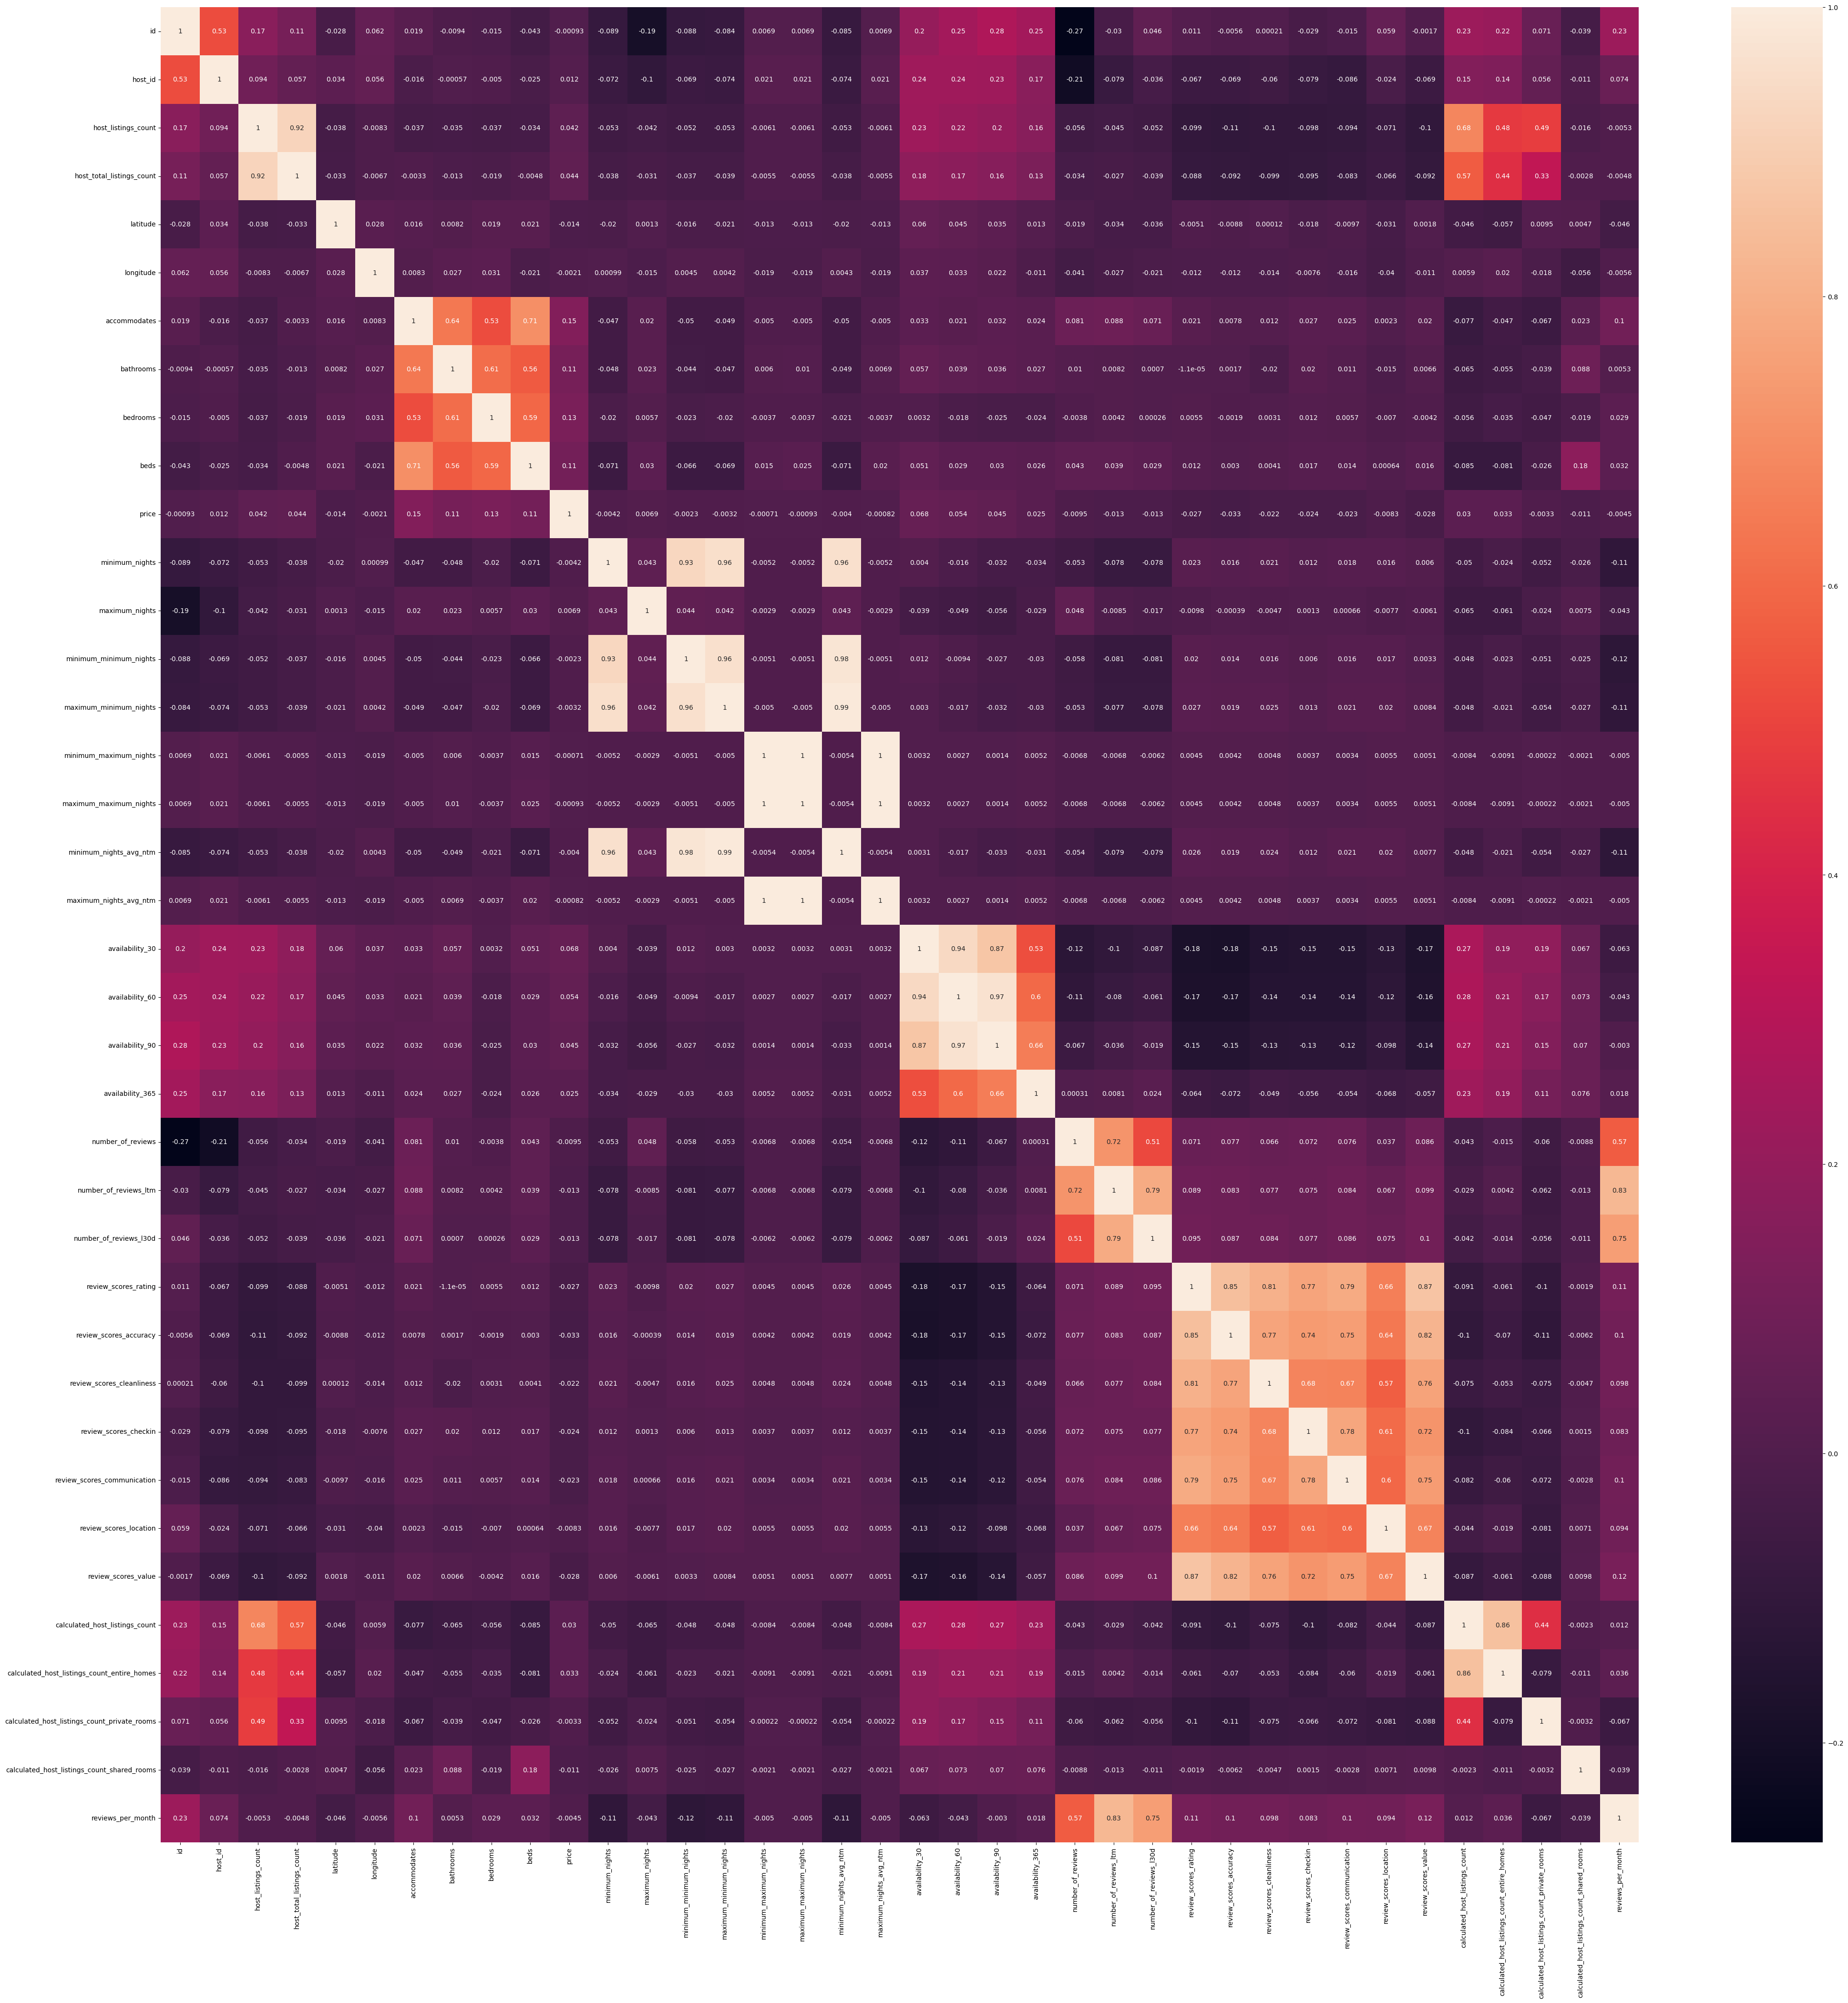

In [32]:
#using correlation map to find dimensions that are correlated to target: price
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df2.corr(numeric_only = True),annot=True)

plt.rcParams['figure.figsize']= (50,50)
plt.show()

In [34]:
#very interesting, the price did not seem to be correlated to any dimensions, investigating
df2['price'].describe()

count      20480.000000
mean        3462.128320
std        17205.085445
min           69.000000
25%         1100.000000
50%         1800.000000
75%         3124.500000
max      1000000.000000
Name: price, dtype: float64

<Axes: >

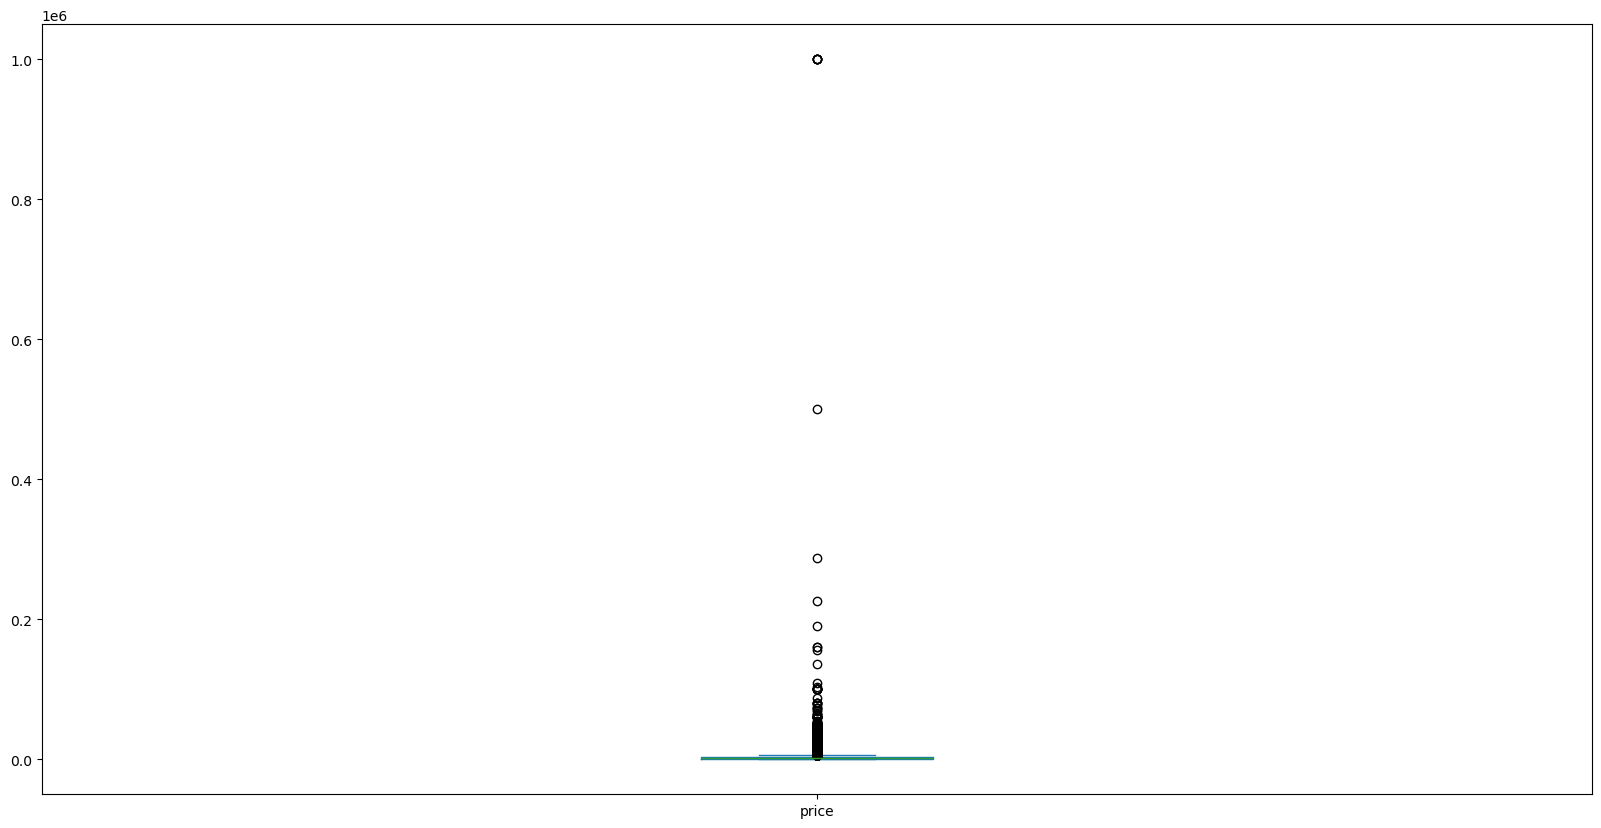

In [36]:
#spotted outlier, the 75% is only 3,124 while the max percentile is 1,000,000, this will skew the data
#finding other outliers
df2['price'].plot.box(figsize=(20,10))

<Axes: >

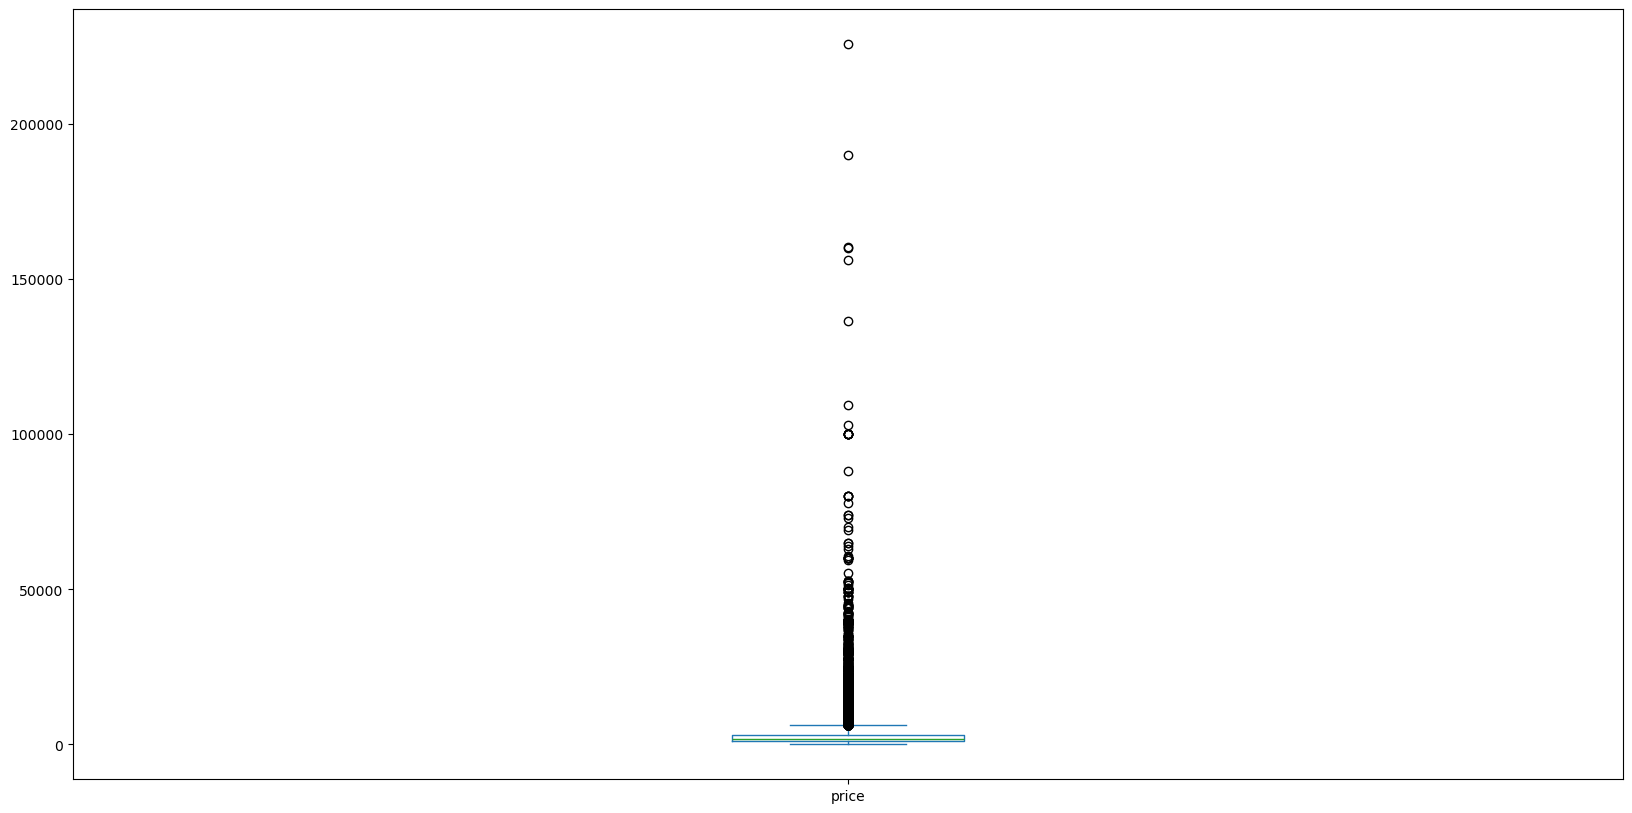

In [38]:
df2.drop(df2[(df2['price'] > (0.25*1000000))].index, inplace=True)
df2['price'].plot.box(figsize=(20,10))

<Axes: >

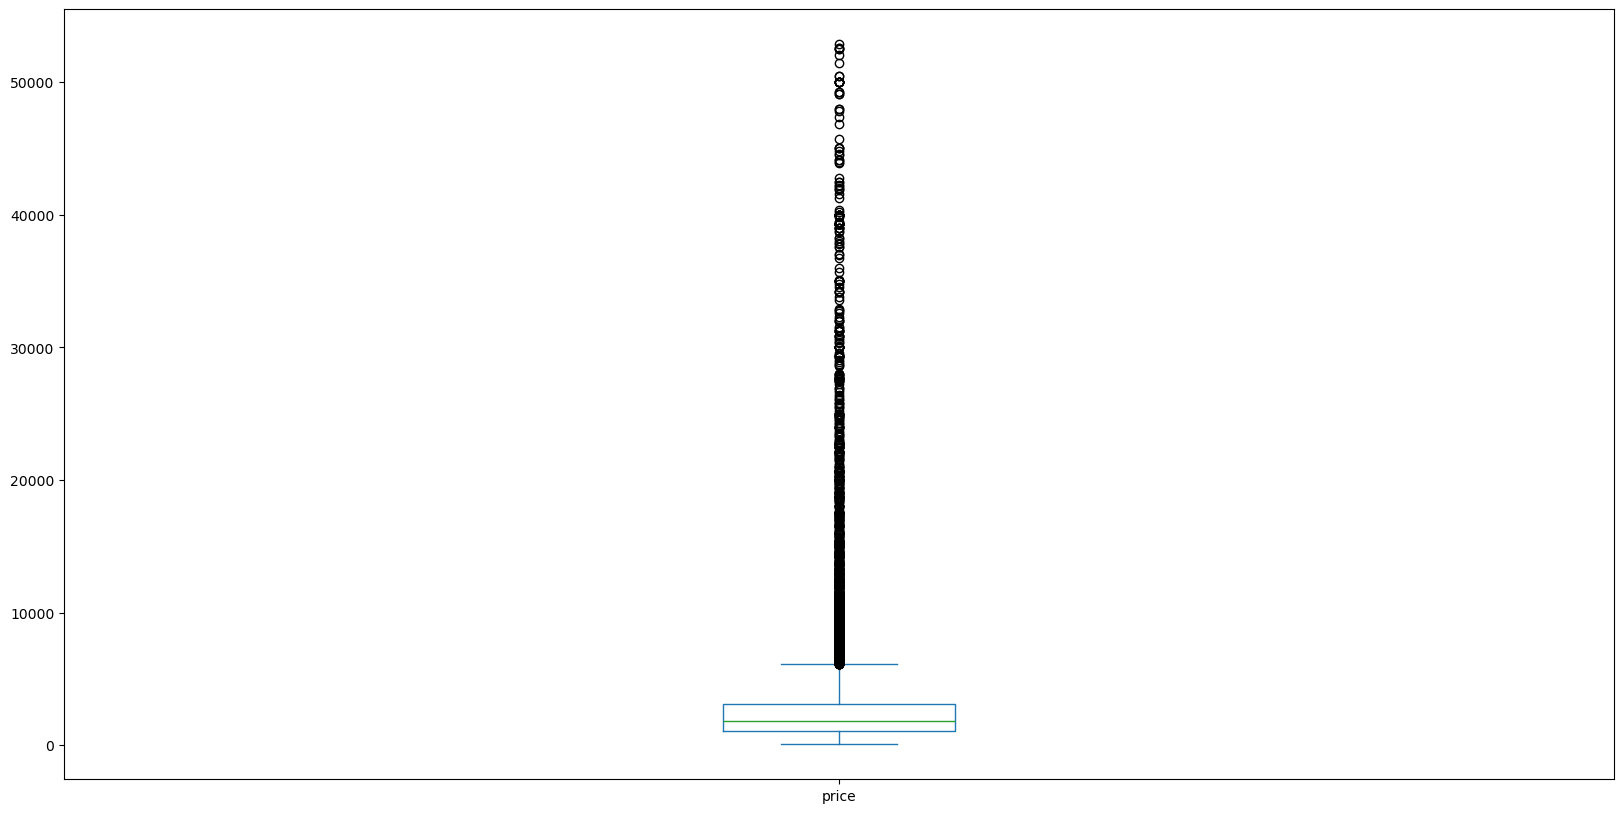

In [40]:
#appears there are still quite a few outliers
df2.drop(df2[(df2['price'] > 55000)].index, inplace=True)
df2['price'].plot.box(figsize=(20,10))

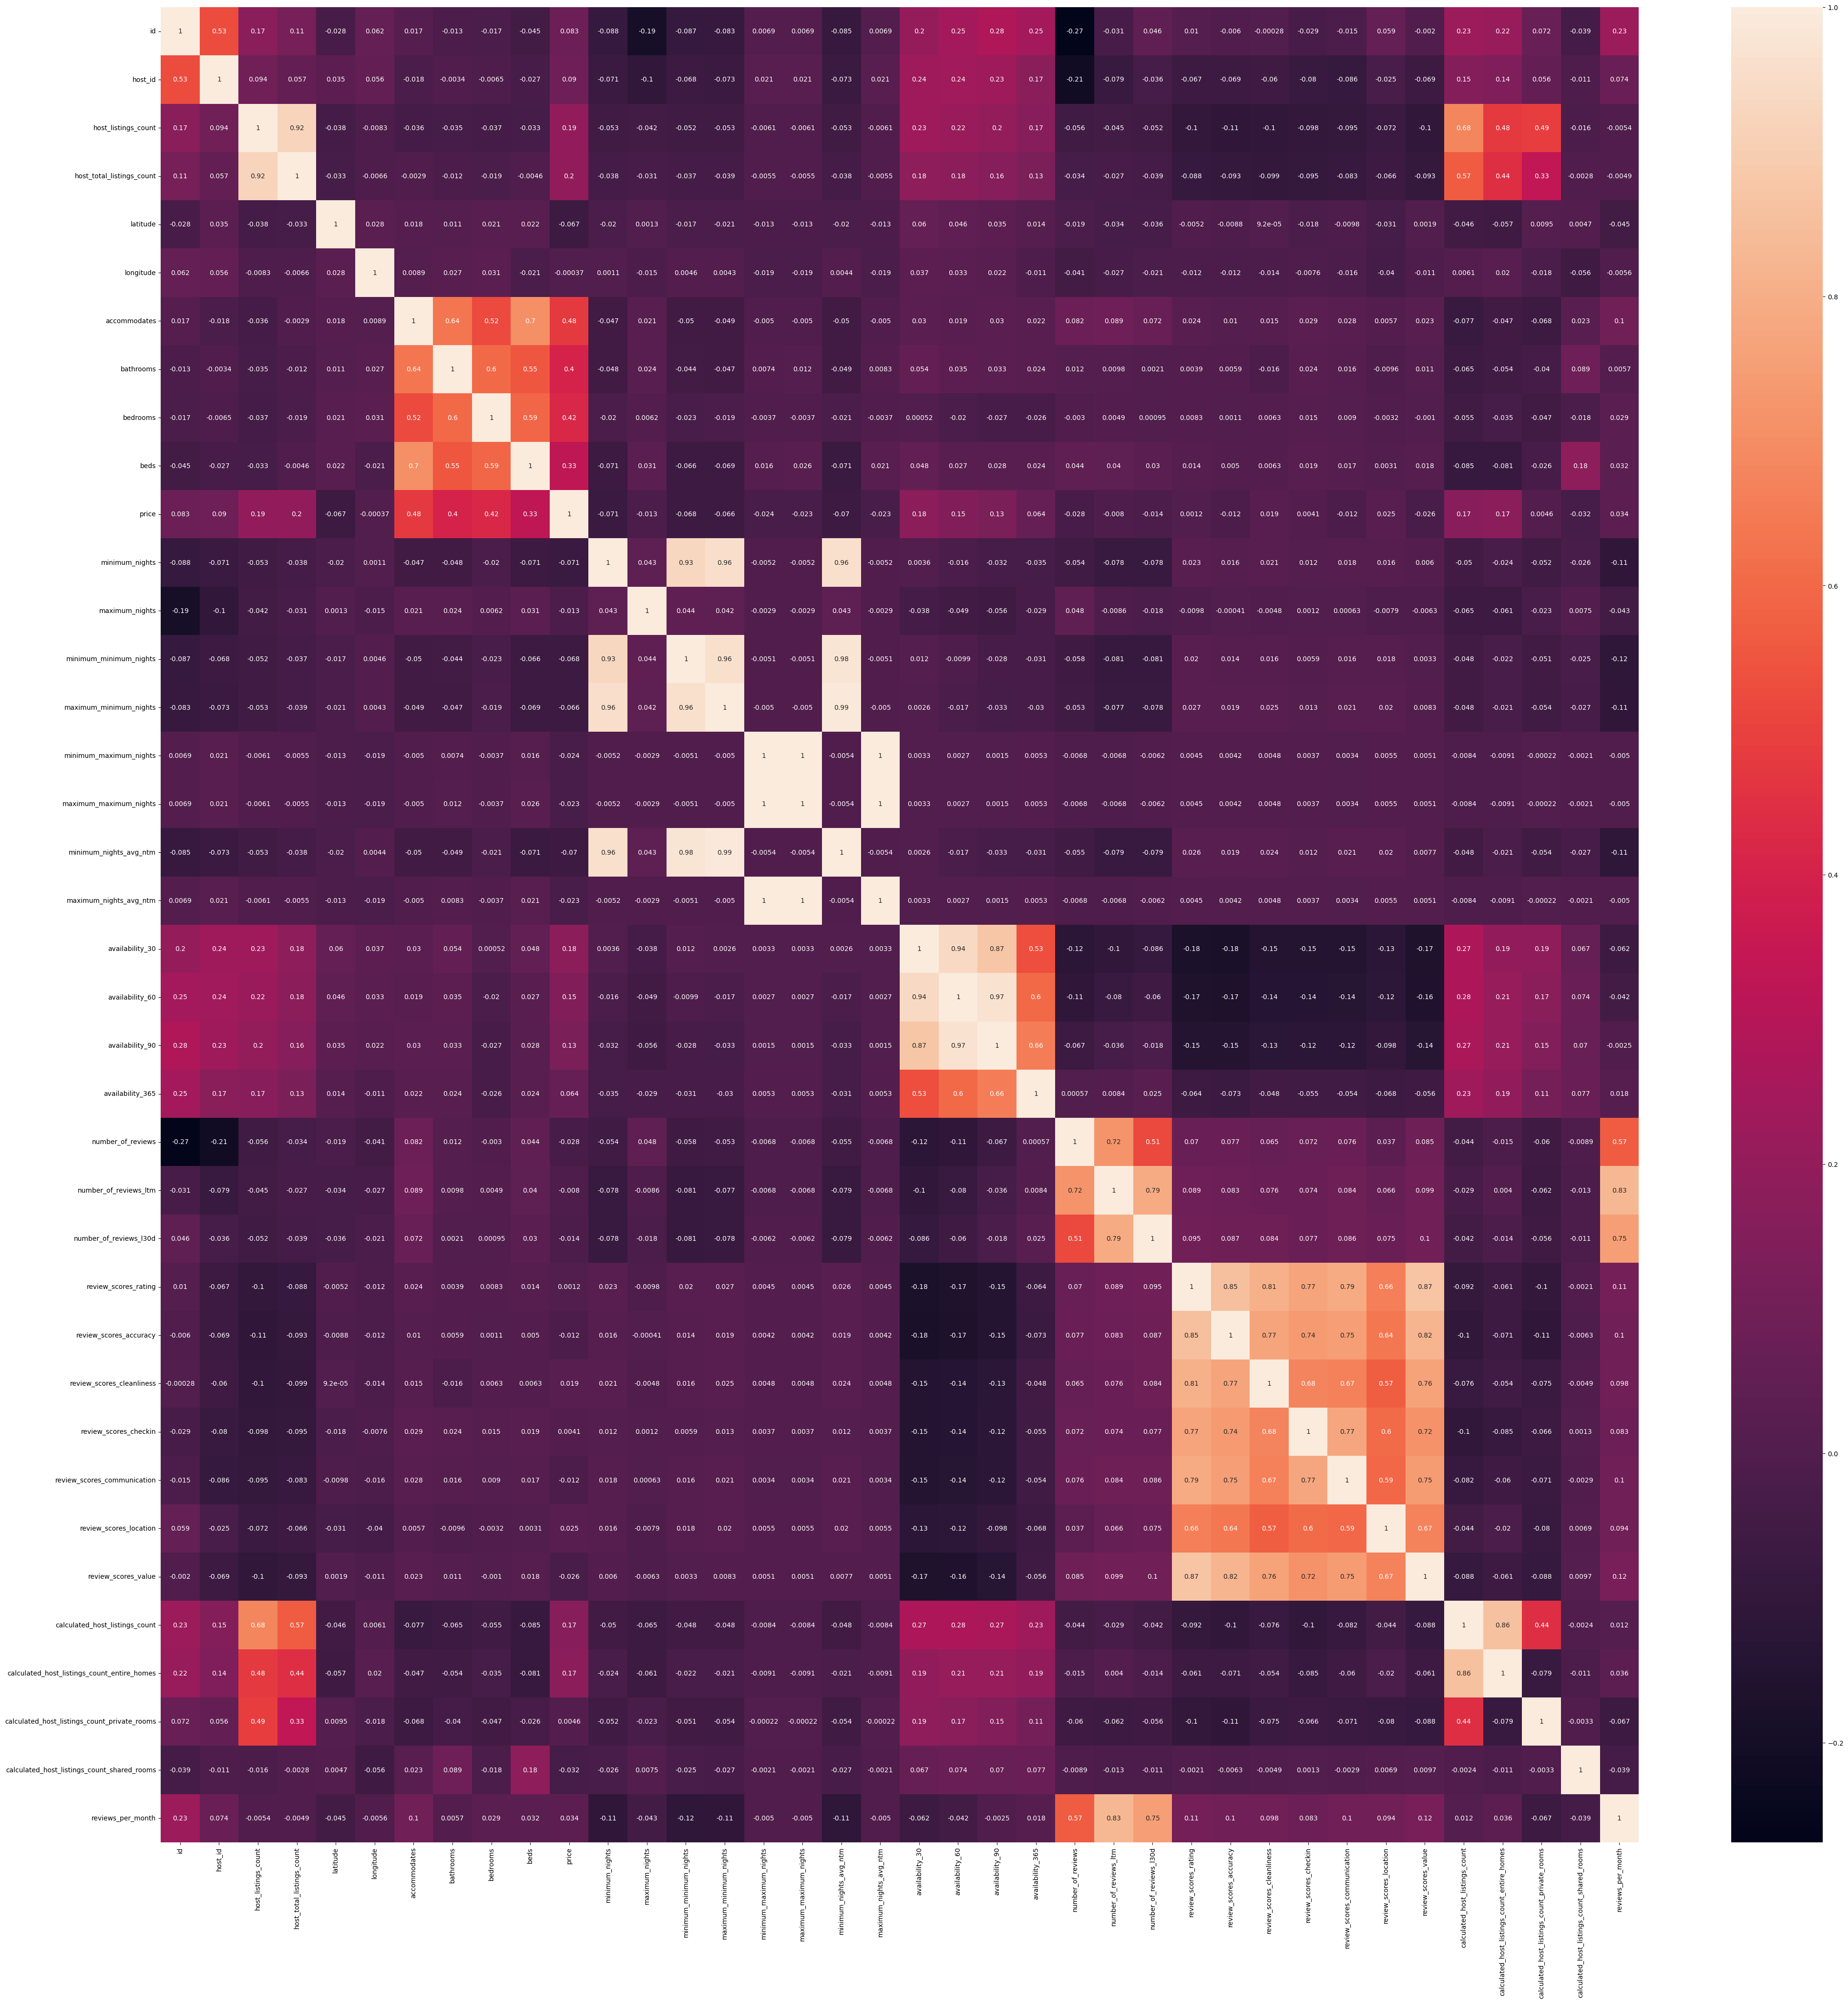

In [42]:
#much better, checking correlation again
sns.heatmap(df2.corr(numeric_only = True),annot=True)

plt.rcParams['figure.figsize']= (50,50)
plt.show()

Data is much better represented now.
It seems only the capacity and the number of bedrooms and bathrooms are directly correlated to the price.
I'm surprised that the number of reviews does not seem to be correlated to the price.

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25563 entries, 0 to 25608
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25563 non-null  int64  
 1   host_id                                       25563 non-null  int64  
 2   host_since                                    25560 non-null  object 
 3   host_response_time                            21660 non-null  object 
 4   host_response_rate                            21660 non-null  object 
 5   host_acceptance_rate                          21650 non-null  object 
 6   host_is_superhost                             24282 non-null  object 
 7   host_listings_count                           25560 non-null  float64
 8   host_total_listings_count                     25560 non-null  float64
 9   host_verifications                            25560 non-null  obje

In [59]:
#preparing data to be exported to updated csv files for data visualisation
#removing dimensions that are not corelated to target: price
df2 = df2.drop(df2.columns[[7,8,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52]], axis=1)
#removing outliers from df1 and df3 as well
df1.drop(df1[(df1['price'] > 55000)].index, inplace=True)
df3.drop(df3[(df3['price'] > 55000)].index, inplace=True)

In [61]:
df1.to_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/Updated Datasets/listings_summary_cleaned.csv')
df2.to_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/Updated Datasets/listings_cleaned.csv')
df3.to_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/Portfolio-Project-1-Python-Airbnb/Updated Datasets/calendar_cleaned.csv')